**Data Uber VS Lyft**

Uber dan Lyft merupakan Transportasi Online. Dalam menentukan tarif, sering kali Uber dan Lyft mempunyai harga yang sangat bervariasi. Harga bervariasi ini ditentukan menurut keadaan seperti : Jarak, Jam, Cuaca, dan lainnya. 

Disini kita akan mempertimbangkan faktor-faktor Uber dan Lyft dalam menentukan variasi harga.

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import scipy
import itertools
from pandas import Series
from numpy.random import randn
import pickle

import matplotlib as mpl
from datetime import datetime
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn import linear_model
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

**Loading dan Review Data**

In [5]:
#Load Data
df = pd.read_csv('rideshare_kaggle.csv')

In [6]:
#Melihat 10 Data Awal
df.head(10)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
5,f6f6d7e4-3e18-4922-a5f5-181cdd3fa6f2,1.545071e+09,18,17,12,2018-12-17 18:25:12,America/New_York,Haymarket Square,North Station,Lyft,...,0.0221,1545066000,34.19,1545048000,40.66,1545022800,27.39,1545044400,34.97,1545080400
6,462816a3-820d-408b-8549-0b39e82f65ac,1.543209e+09,5,26,11,2018-11-26 05:03:00,America/New_York,Back Bay,Northeastern University,Lyft,...,0.1245,1543251600,40.67,1543233600,46.46,1543255200,37.45,1543291200,43.81,1543251600
7,474d6376-bc59-4ec9-bf57-4e6d6faeb165,1.543780e+09,19,2,12,2018-12-02 19:53:04,America/New_York,Back Bay,Northeastern University,Lyft,...,0.0916,1543770000,36.32,1543726800,50.80,1543788000,35.84,1543748400,50.13,1543788000
8,4f9fee41-fde3-4767-bbf1-a00e108701fb,1.543818e+09,6,3,12,2018-12-03 06:28:02,America/New_York,Back Bay,Northeastern University,Lyft,...,0.0004,1543852800,43.09,1543896000,57.02,1543852800,39.90,1543896000,56.35,1543852800
9,8612d909-98b8-4454-a093-30bd48de0cb3,1.543316e+09,10,27,11,2018-11-27 10:45:22,America/New_York,Back Bay,Northeastern University,Lyft,...,0.1425,1543338000,36.34,1543377600,46.91,1543320000,32.43,1543377600,44.01,1543320000


In [7]:
#Melihat 10 Data Terakhir
df.tail(10)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
693061,54362c72-124b-47e8-8d07-62a07cfff624,1.543728e+09,5,2,12,2018-12-02 05:28:04,America/New_York,Theatre District,Haymarket Square,Uber,...,0.0916,1543770000,36.32,1543726800,50.80,1543788000,35.84,1543748400,50.13,1543788000
693062,64a50889-d05b-49de-b416-1802db5c27ac,1.543728e+09,5,2,12,2018-12-02 05:28:04,America/New_York,Theatre District,Haymarket Square,Uber,...,0.0916,1543770000,36.32,1543726800,50.80,1543788000,35.84,1543748400,50.13,1543788000
693063,6c1d9207-a9af-431e-a65f-3d9d205f28bf,1.543728e+09,5,2,12,2018-12-02 05:28:04,America/New_York,Theatre District,Haymarket Square,Uber,...,0.0916,1543770000,36.32,1543726800,50.80,1543788000,35.84,1543748400,50.13,1543788000
693064,25ed29df-4f9c-4aac-8218-681427f1d738,1.543728e+09,5,2,12,2018-12-02 05:28:04,America/New_York,West End,North End,Uber,...,0.0916,1543770000,36.32,1543726800,50.80,1543788000,35.84,1543748400,50.13,1543788000
693065,353e6566-b272-479e-a9c6-98bd6cb23f25,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693070,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [8]:
#Melihat jumlah row dan kolom 
print(df.shape)

(693071, 57)


In [9]:
df.nunique()

id                             693071
timestamp                       36179
hour                               24
day                                17
month                               2
datetime                        31350
timezone                            1
source                             12
destination                        12
cab_type                            2
product_id                         13
name                               13
price                             147
distance                          549
surge_multiplier                    7
latitude                           11
longitude                          12
temperature                       308
apparentTemperature               319
short_summary                       9
long_summary                       11
precipIntensity                    63
precipProbability                  29
humidity                           51
windSpeed                         291
windGust                          286
windGustTime

In [10]:
print(df.columns)

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

**Data Cleaning**

In [12]:
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [13]:
df.isnull().values.any()

True

In [14]:
#Menghapus 55095 data yang tidak ada harganya
df.dropna(inplace=True)

In [15]:
df.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

In [16]:
df['timestamp'] = df['timestamp'].astype(int)

In [17]:
#Mengubah Timestamp dan datetime menjadi hari dan jam serta suasana seperti Morning, Afternoon, Evening, Night
df['rounded_timestamp'] = df['timestamp']/1000
df['rounded_timestamp'] = df['rounded_timestamp'].apply(np.floor)
df['date'] = df['rounded_timestamp'].apply(lambda x : datetime.fromtimestamp(x).date())
df['time'] = df['rounded_timestamp'].apply(lambda x : datetime.fromtimestamp(x).time())
df['weekday'] = df['date'].apply(lambda x:x.weekday())
df['weekday'] = df['weekday'].map({0: 'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'})
df['hour'] = df['time'].apply(lambda time: time.hour)

In [18]:
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [19]:


#df = df.drop(columns=df.columns[20:])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 61 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           637976 non-null  object 
 1   timestamp                    637976 non-null  int64  
 2   hour                         637976 non-null  int64  
 3   day                          637976 non-null  int64  
 4   month                        637976 non-null  int64  
 5   datetime                     637976 non-null  object 
 6   timezone                     637976 non-null  object 
 7   source                       637976 non-null  object 
 8   destination                  637976 non-null  object 
 9   cab_type                     637976 non-null  object 
 10  product_id                   637976 non-null  object 
 11  name                         637976 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [21]:
df.replace(np.nan,0)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime,rounded_timestamp,date,time,weekday
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1544952607,4,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,43.68,1544968800,33.73,1545012000,38.07,1544958000,1544952.0,1970-01-19,04:09:12,Monday
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1543284023,3,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,47.30,1543251600,36.20,1543291200,43.92,1543251600,1543284.0,1970-01-19,03:41:24,Monday
2,981a3613-77af-4620-a42a-0c0866077d1e,1543366822,3,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,47.55,1543320000,31.04,1543377600,44.12,1543320000,1543366.0,1970-01-19,03:42:46,Monday
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1543553582,3,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,45.03,1543510800,30.30,1543550400,38.53,1543510800,1543553.0,1970-01-19,03:45:53,Monday
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1543463360,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,42.18,1543420800,29.11,1543392000,35.75,1543420800,1543463.0,1970-01-19,03:44:23,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,353e6566-b272-479e-a9c6-98bd6cb23f25,1543708386,3,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,44.76,1543690800,27.77,1543658400,44.09,1543690800,1543708.0,1970-01-19,03:48:28,Monday
693066,616d3611-1820-450a-9845-a9ff304a4842,1543708386,3,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,44.76,1543690800,27.77,1543658400,44.09,1543690800,1543708.0,1970-01-19,03:48:28,Monday
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1543708386,3,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,44.76,1543690800,27.77,1543658400,44.09,1543690800,1543708.0,1970-01-19,03:48:28,Monday
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1543708386,3,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,44.76,1543690800,27.77,1543658400,44.09,1543690800,1543708.0,1970-01-19,03:48:28,Monday


In [22]:
#Weather
print(df.short_summary.unique())
for i in df.short_summary.unique():
  df[i] = (df.name == i).astype('int')

[' Mostly Cloudy ' ' Rain ' ' Clear ' ' Partly Cloudy ' ' Overcast '
 ' Light Rain ' ' Foggy ' ' Possible Drizzle ' ' Drizzle ']


**Eksplorasi Data**

In [23]:
#Membagi dua Dataset, karena terdapat Uber dan Lyft
uber_df= df[df['cab_type'] == "Uber"]
lyft_df= df[df['cab_type'] == "Lyft"]

In [24]:
print(lyft_df.product_id.unique())
print(lyft_df.name.unique())
print(uber_df.product_id.unique())
print(uber_df.name.unique())

['lyft_line' 'lyft_premier' 'lyft' 'lyft_luxsuv' 'lyft_plus' 'lyft_lux']
['Shared' 'Lux' 'Lyft' 'Lux Black XL' 'Lyft XL' 'Lux Black']
['6f72dfc5-27f1-42e8-84db-ccc7a75f6969'
 '6c84fd89-3f11-4782-9b50-97c468b19529'
 '55c66225-fbe7-4fd5-9072-eab1ece5e23e'
 '9a0e7b09-b92b-4c41-9779-2ad22b4d779d'
 '6d318bcc-22a3-4af6-bddd-b409bfce1546'
 '997acbb5-e102-41e1-b155-9df7de0a73f2']
['UberXL' 'Black' 'UberX' 'WAV' 'Black SUV' 'UberPool']


In [25]:
pd.crosstab(lyft_df.product_id,lyft_df.name)

name,Lux,Lux Black,Lux Black XL,Lyft,Lyft XL,Shared
product_id,,,,,,
lyft,0,0,0,51235,0,0
lyft_line,0,0,0,0,0,51233
lyft_lux,0,51235,0,0,0,0
lyft_luxsuv,0,0,51235,0,0,0
lyft_plus,0,0,0,0,51235,0
lyft_premier,51235,0,0,0,0,0


In [26]:
pd.crosstab(uber_df.product_id,uber_df.name)

name,Black,Black SUV,UberPool,UberX,UberXL,WAV
product_id,,,,,,
55c66225-fbe7-4fd5-9072-eab1ece5e23e,0,0,0,55094,0,0
6c84fd89-3f11-4782-9b50-97c468b19529,55095,0,0,0,0,0
6d318bcc-22a3-4af6-bddd-b409bfce1546,0,55096,0,0,0,0
6f72dfc5-27f1-42e8-84db-ccc7a75f6969,0,0,0,0,55096,0
997acbb5-e102-41e1-b155-9df7de0a73f2,0,0,55091,0,0,0
9a0e7b09-b92b-4c41-9779-2ad22b4d779d,0,0,0,0,0,55096


In [27]:
#Faktor yang berefek ke Lonjakan
#Korelasi Lonjakan dengan Harga dan Jarak
df['cab_type'].value_counts()

Uber    330568
Lyft    307408
Name: cab_type, dtype: int64

In [28]:
#Mengambil nilai numerik, untuk menemukan korelasi
uber_corr = uber_df[['distance','price','surge_multiplier']]
lyft_corr = lyft_df[['distance','price','surge_multiplier']]

Warna Kuning menandakan korelasi positif yang kuat, dan warna ungu menunjukkan korelasi yang rendah

<AxesSubplot:>

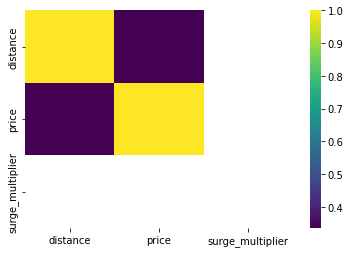

In [29]:
sns.heatmap(uber_corr.corr(), cmap="viridis")

Untuk Lyft :
- surge_multiplier dengan distance mempunyai korelasi yg rendah 
- surge_multiplier dan price lebih berkorelasi 

<AxesSubplot:>

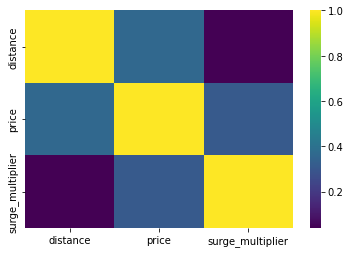

In [30]:
sns.heatmap(lyft_corr.corr(), cmap="viridis")

Untuk Uber :
- price dan distance mempunyai korelasi yang rendah

In [31]:
#5 Destinasi yang paling sering dikunjungin untuk Uber
uber_destinasi = uber_df.groupby(['source','destination']).size().reset_index()
uber_destinasi.columns = ['source','destination','count']
uber_destinasi.sort_values('count', inplace = True, ascending = False)
uber_five_most = uber_destinasi.iloc[0:5, ]
uber_five_most["Source Destination"] = uber_destinasi['source'] + " - " + uber_destinasi['destination']

<ipython-input-31-dfa98cb24b60>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uber_five_most["Source Destination"] = uber_destinasi['source'] + " - " + uber_destinasi['destination']


In [32]:
uber_five_most = uber_five_most[["Source Destination", "count"]]
uber_five_most

,Source Destination,count
29,Financial District - South Station,4908
56,South Station - Financial District,4908
36,North End - Back Bay,4866
3,Back Bay - North End,4866
67,West End - Fenway,4830


In [33]:
#5 Destinasi yang paling sering dikunjungin untuk Lyft
lyft_destinasi = lyft_df.groupby(['source','destination']).size().reset_index()
lyft_destinasi.columns = ['source','destination','count']
lyft_destinasi.sort_values('count', inplace = True, ascending = False)
lyft_five_most = lyft_destinasi.iloc[0:5, ]
lyft_five_most["Source Destination"] = lyft_destinasi['source'] + " - " + lyft_destinasi['destination']

<ipython-input-33-b07fa937f987>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lyft_five_most["Source Destination"] = lyft_destinasi['source'] + " - " + lyft_destinasi['destination']


In [34]:
lyft_five_most = lyft_five_most[["Source Destination", "count"]]
lyft_five_most

,Source Destination,count
56,South Station - Financial District,4626
29,Financial District - South Station,4626
36,North End - Back Bay,4548
3,Back Bay - North End,4548
67,West End - Fenway,4530


In [35]:
high_surge_rows = df[df["surge_multiplier"] >= 2]
loc_wise_surge = high_surge_rows.groupby(['source','destination']).size().reset_index()

In [36]:
loc_wise_surge.columns=['source','destination','count']

In [37]:
loc_wise_surge.sort_values(inplace=True,ascending=False,by=['count'])

In [38]:
highest_destination_surge = loc_wise_surge.head(5)
lowest_destination_surge = loc_wise_surge.tail(5)


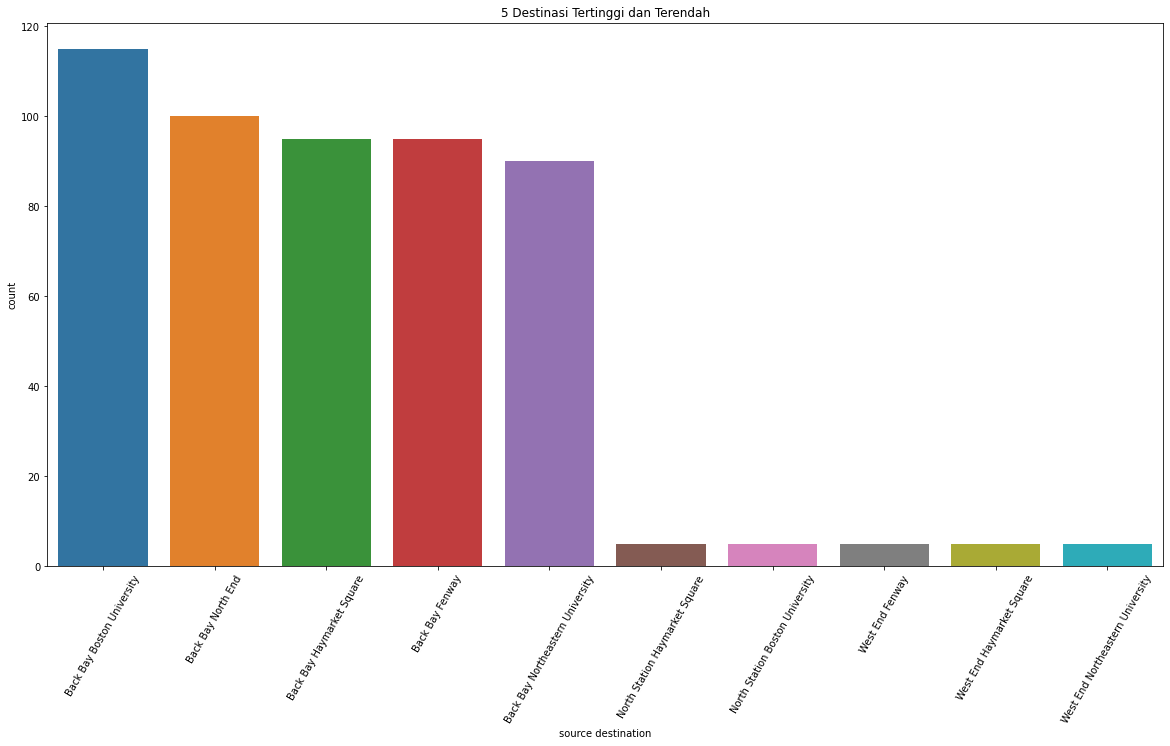

In [39]:
#Destinasi Tertinggi
destination_surge = highest_destination_surge.append(lowest_destination_surge, ignore_index=True)
destination_surge["source destination"] = destination_surge['source'] + " " + destination_surge['destination']
plt.figure(figsize=(20,10))
g = sns.barplot(data = destination_surge, x = "source destination", y = 'count')
g.set_title("5 Destinasi Tertinggi dan Terendah")
loc, labels = plt.xticks()
g.set_xticklabels(labels, rotation=60);

Dari hasil visualisasi diatas, bisa kita lihat 5 destinasi yang paling sering dikunjungi, dan 5 destinasi yang paling rendah dikunjungi.

In [40]:
#Apakah Jarak dan Harga akan mempengaruhi 'shared' rides?
lyft_shared_rides_df = lyft_df[lyft_df["name"] == "Shared"]
lyft_shared_rides_distance_price = lyft_shared_rides_df.groupby(["name", "distance", "price"]).size().reset_index()
lyft_shared_rides_distance_price.columns = ["name", "distance", "price", "count"]

In [41]:
lyft_shared_rides_distance_price

,name,distance,price,count
0,Shared,0.39,2.5,1
1,Shared,0.39,3.0,4
2,Shared,0.39,3.5,1
3,Shared,0.39,5.0,36
4,Shared,0.39,7.0,1
...,...,...,...,...
2778,Shared,6.12,10.5,1
2779,Shared,6.12,13.5,1
2780,Shared,6.13,11.0,1
2781,Shared,6.14,10.5,1


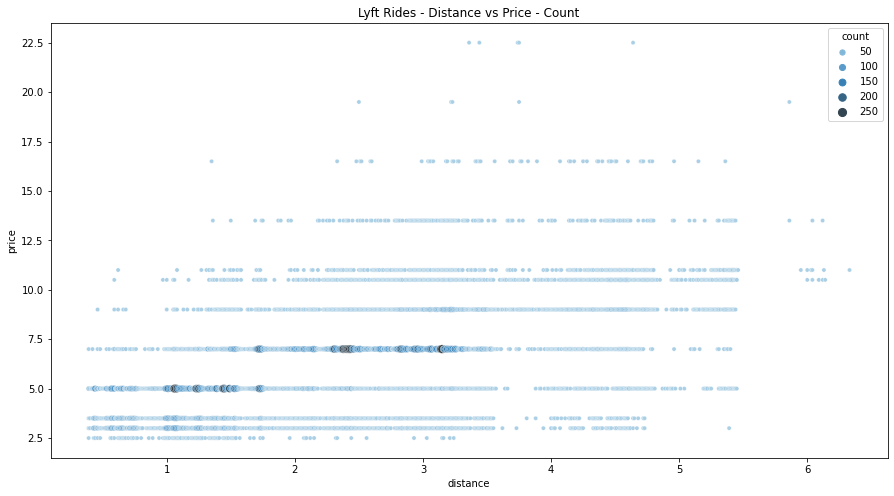

In [42]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data = lyft_shared_rides_distance_price, palette="Blues_d" , x = "distance", y="price", hue="count", size="count").set_title("Lyft Rides - Distance vs Price - Count");

Dari hasil visualisasi Lyft Rides - Distance VS Price - Count :
- Jika distance meningkat, maka price juga akan meningkat

In [43]:
df['price'][df['cab_type'] == "Uber"].describe()

count    330568.000000
mean         15.795343
std           8.560300
min           4.500000
25%           9.000000
50%          12.500000
75%          21.500000
max          89.500000
Name: price, dtype: float64

In [44]:
df['price'][df['cab_type'] == "Lyft"].describe()

count    307408.000000
mean         17.351396
std          10.019171
min           2.500000
25%           9.000000
50%          16.500000
75%          22.500000
max          97.500000
Name: price, dtype: float64

In [45]:
df1 = df.rename(columns={"price": "Price", "name": "Product", "short_summary": "Weather", "hour": "Hour", "cab_type": 'Brand'})

In [46]:
df1.loc[df1['Product'] == 'Taxi', 'Product'] = 'UberTaxi'
df1.loc[df1['Product'] == 'Shared', 'Product'] = 'Lyft Shared'
df1.loc[df1['Product'] == 'Lux', 'Product'] = 'Lyft Lux'
df1.loc[df1['Product'] == 'Lyft', 'Product'] = 'Lyft Regular'
df1.loc[df1['Product'] == 'Black SUV', 'Product'] = 'Uber Black SUV'
df1.loc[df1['Product'] == 'WAV', 'Product'] = 'Uber WAV'
df1.loc[df1['Product'] == 'Black', 'Product'] = 'Uber Black'

In [47]:
df.groupby('cab_type').count()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,product_id,...,weekday,Mostly Cloudy,Rain,Clear,Partly Cloudy,Overcast,Light Rain,Foggy,Possible Drizzle,Drizzle
cab_type,,,,,,,,,,,,,,,,,,,,,
Lyft,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,...,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408
Uber,330568,330568,330568,330568,330568,330568,330568,330568,330568,330568,...,330568,330568,330568,330568,330568,330568,330568,330568,330568,330568


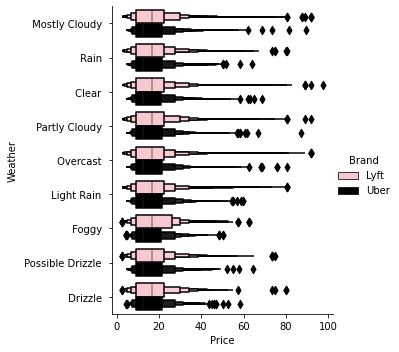

In [48]:
custom_palette = ['pink','black']
sns.set_palette(custom_palette)
sns.catplot(x="Price", y="Weather", hue="Brand", kind="boxen", data=df1)

Seperti yang digambarkan pada plot diatas bahwa disaat cuaca :
- Mostly Cloudy

Lyft memiliki harga yang lebih mahal ketimbang uber

- Rain

Lyft memiliki harga yang lebih mahal ketimbang uber

- Clear 

Lyft memiliki harga yang lebih mahal ketimbang uber

- Partly Cloudy 

Lyft memiliki harga yang lebih mahal ketimbang uber

- Overcast

Lyft memiliki harga yang lebih mahal ketimbang uber

- Light Rain

Lyft memiliki harga yang lebih mahal ketimbang uber

- Foggy 

Lyft memiliki harga yang lebih mahal ketimbang uber

- Possible Drizzle

Lyft memiliki harga yang lebih mahal ketimbang uber

- Drizzle

Lyft memiliki harga yang lebih mahal ketimbang uber


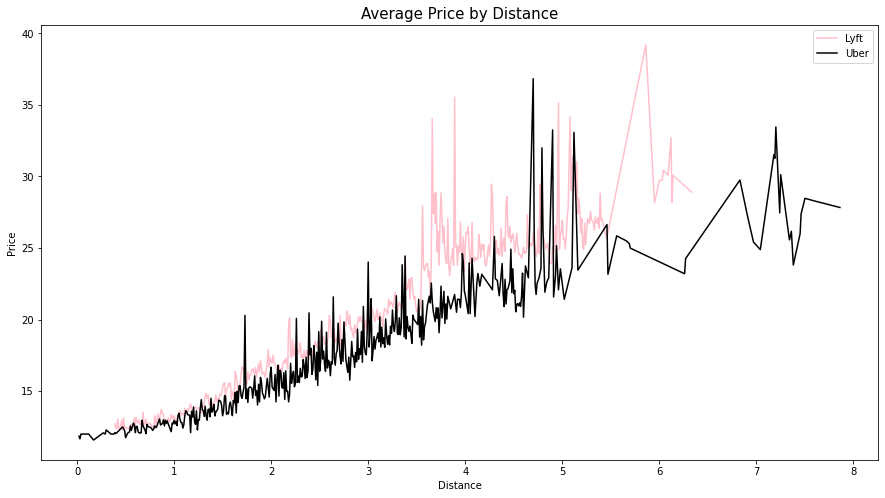

In [49]:
fig , ax = plt.subplots(figsize = (15,8))
ax.plot(df[df['cab_type'] == 'Lyft'].groupby('distance').price.mean().index, df[df['cab_type'] == 'Lyft'].groupby('distance')['price'].mean(), label = 'Lyft')
ax.plot(df[df['cab_type'] == 'Uber'].groupby('distance').price.mean().index, df[df['cab_type'] =='Uber'].groupby('distance')['price'].mean(), label = 'Uber')
ax.set_title('Average Price by Distance', fontsize= 15)
ax.set(xlabel = 'Distance', ylabel = 'Price')
ax.legend()
plt.show()

Semakin tinggi jarak yang akan ditempuh, maka akan semakin tinggi pula harga yang didapat.

**Preprocessing**

In [50]:
data = df.copy()
data.reset_index(inplace=True)
data

,index,id,timestamp,hour,day,month,datetime,timezone,source,destination,...,weekday,Mostly Cloudy,Rain,Clear,Partly Cloudy,Overcast,Light Rain,Foggy,Possible Drizzle,Drizzle
0,0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1544952607,4,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,...,Monday,0,0,0,0,0,0,0,0,0
1,1,4bd23055-6827-41c6-b23b-3c491f24e74d,1543284023,3,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,...,Monday,0,0,0,0,0,0,0,0,0
2,2,981a3613-77af-4620-a42a-0c0866077d1e,1543366822,3,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,...,Monday,0,0,0,0,0,0,0,0,0
3,3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1543553582,3,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,...,Monday,0,0,0,0,0,0,0,0,0
4,4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1543463360,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,...,Monday,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637971,693065,353e6566-b272-479e-a9c6-98bd6cb23f25,1543708386,3,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,...,Monday,0,0,0,0,0,0,0,0,0
637972,693066,616d3611-1820-450a-9845-a9ff304a4842,1543708386,3,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,...,Monday,0,0,0,0,0,0,0,0,0
637973,693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1543708386,3,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,...,Monday,0,0,0,0,0,0,0,0,0
637974,693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1543708386,3,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,...,Monday,0,0,0,0,0,0,0,0,0


In [51]:
data = df.drop(columns=df.columns[20:])
data

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1544952607,4,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.0330,42.34,37.12,Mostly Cloudy
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1543284023,3,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.0330,43.58,37.35,Rain
2,981a3613-77af-4620-a42a-0c0866077d1e,1543366822,3,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.0330,38.33,32.93,Clear
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1543553582,3,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.0330,34.38,29.63,Clear
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1543463360,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.0330,37.44,30.88,Partly Cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,353e6566-b272-479e-a9c6-98bd6cb23f25,1543708386,3,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,9.5,1.00,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy
693066,616d3611-1820-450a-9845-a9ff304a4842,1543708386,3,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.0,1.00,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1543708386,3,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,9.5,1.00,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1543708386,3,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,27.0,1.00,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy


In [52]:
categorical_features = [column_name for column_name in data.columns if data[column_name].dtype == 'O']
print("Number of Categorical Features: {}".format(len(categorical_features)))
print("Categorical Features: ",categorical_features)

Number of Categorical Features: 9
Categorical Features:  ['id', 'datetime', 'timezone', 'source', 'destination', 'cab_type', 'product_id', 'name', 'short_summary']


In [53]:
# Numerical Features:

numerical_features = [column_name for column_name in data.columns if data[column_name].dtype != 'O']

#rain.select_dtypes(include=['float64','int64']).columns 

print("Number of Numerical Features: {}".format(len(numerical_features)))
print("Numerical Features: ",numerical_features)

Number of Numerical Features: 11
Numerical Features:  ['timestamp', 'hour', 'day', 'month', 'price', 'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature', 'apparentTemperature']


In [54]:
data[categorical_features].isnull().sum()

id               0
datetime         0
timezone         0
source           0
destination      0
cab_type         0
product_id       0
name             0
short_summary    0
dtype: int64

In [55]:
data[numerical_features].isnull().sum()

timestamp              0
hour                   0
day                    0
month                  0
price                  0
distance               0
surge_multiplier       0
latitude               0
longitude              0
temperature            0
apparentTemperature    0
dtype: int64

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/seab

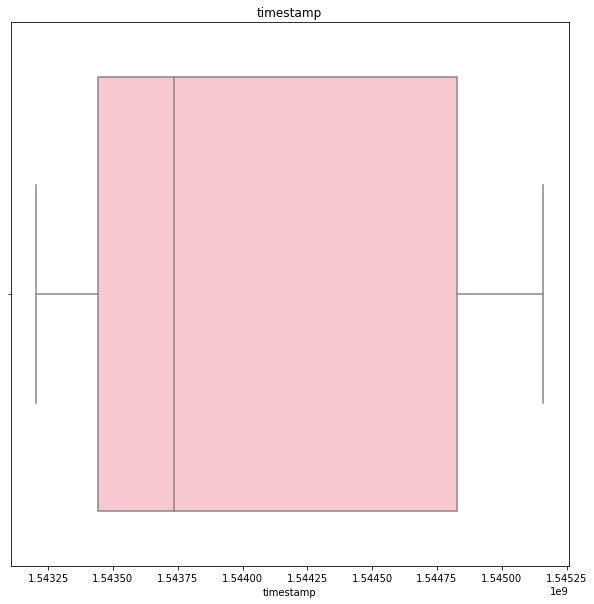

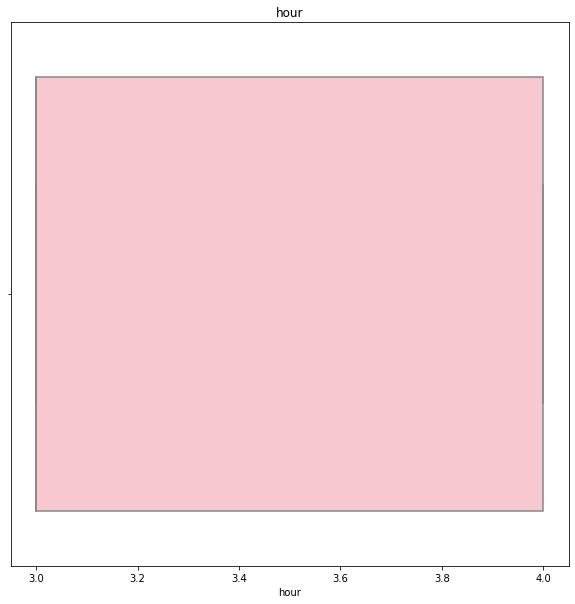

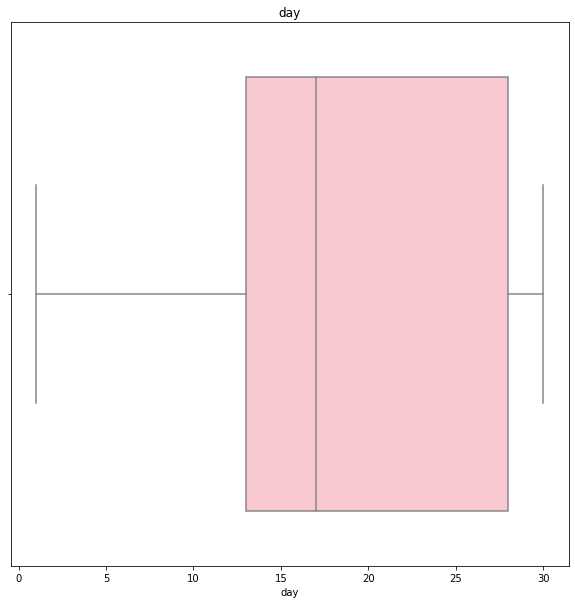

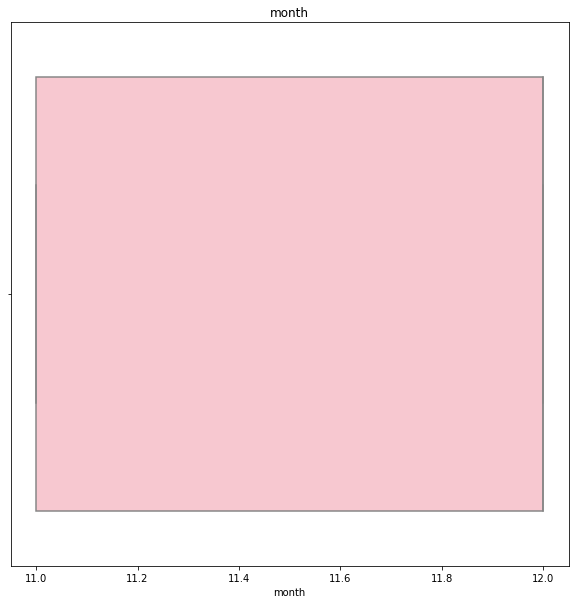

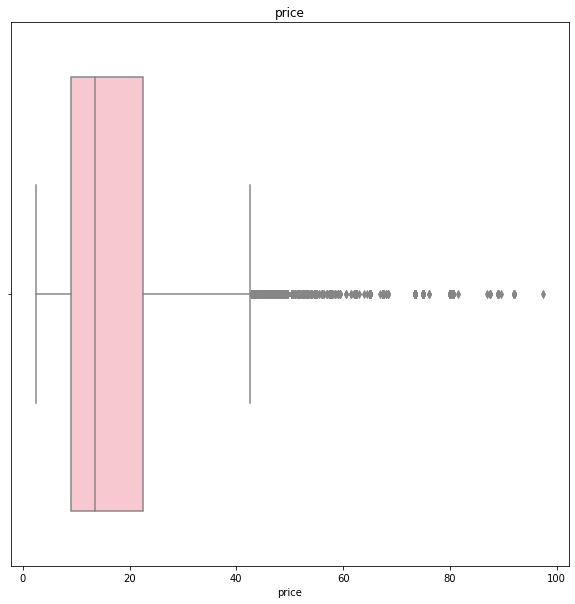

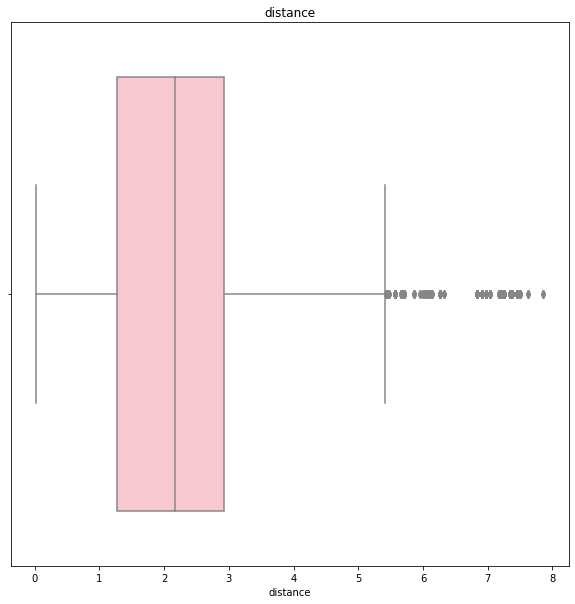

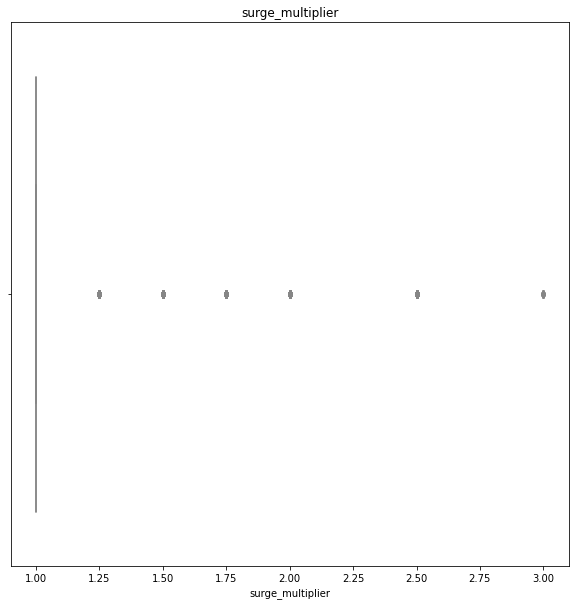

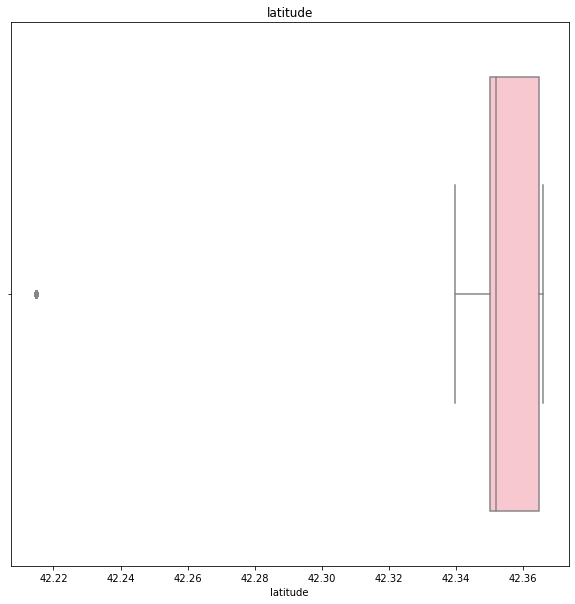

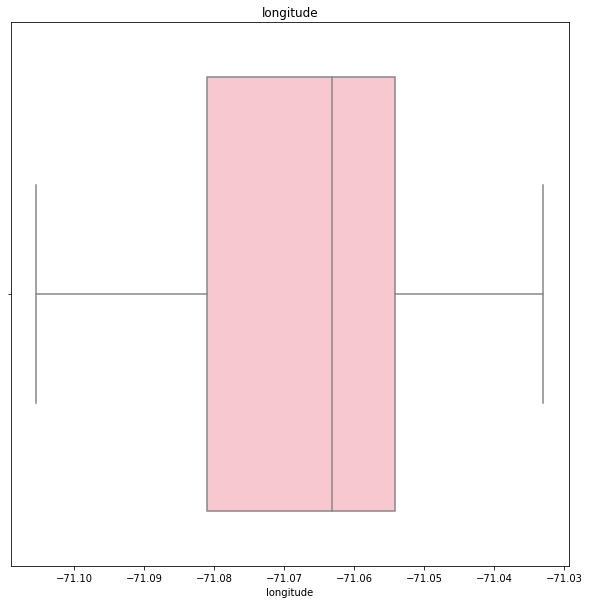

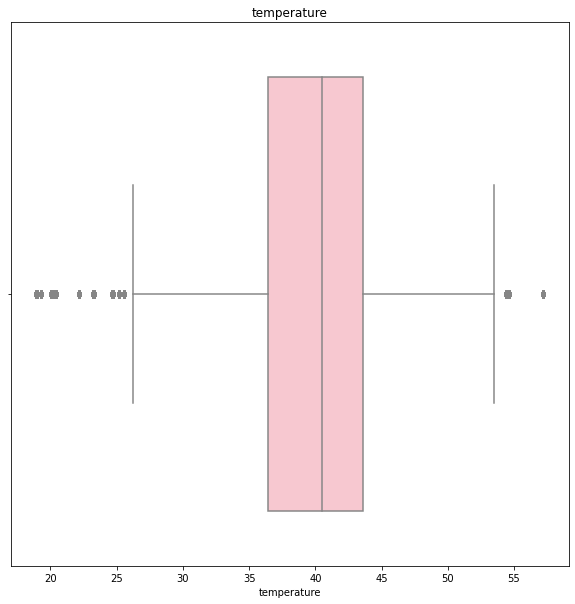

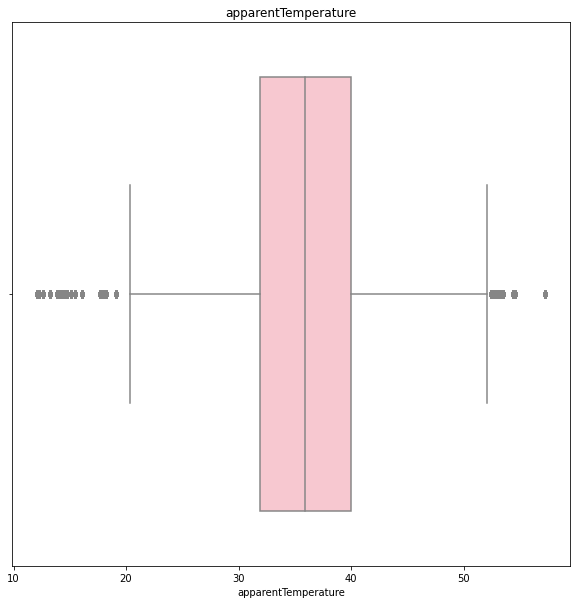

In [56]:
#checking for outliers using Box Plot:

for feature in numerical_features:
    plt.figure(figsize=(10,10))
    sns.boxplot(data[feature])
    plt.title(feature)

In [57]:
data[numerical_features].describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature
count,6.379760e+05,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.00000
mean,1.544046e+09,3.371092,17.797674,11.586550,16.545125,2.189261,1.015068,42.338161,-71.066144,39.582406,35.87844
std,6.892028e+05,0.483097,9.982083,0.492452,9.324359,1.135413,0.095422,0.047856,0.020303,6.725500,7.91726
min,1.543204e+09,3.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,12.13000
25%,1.543444e+09,3.000000,13.000000,11.000000,9.000000,1.270000,1.000000,42.350300,-71.081000,36.450000,31.91000
50%,1.543737e+09,3.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,35.90000
75%,1.544828e+09,4.000000,28.000000,12.000000,22.500000,2.930000,1.000000,42.364700,-71.054200,43.580000,40.01000
max,1.545161e+09,4.000000,30.000000,12.000000,97.500000,7.860000,3.000000,42.366100,-71.033000,57.220000,57.22000


In [58]:
features_with_outliers = ['timestamp', 'hour', 'day', 
                          'month', 'price','distance', 
                         'latitude', 
                          'longitude', 'temperature', 'apparentTemperature']

In [59]:
# Replacing outliers using IQR:

for feature in features_with_outliers:
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    data.loc[data[feature]<lower_limit,feature] = lower_limit
    data.loc[data[feature]>upper_limit,feature] = upper_limit

/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/site-packages/seab

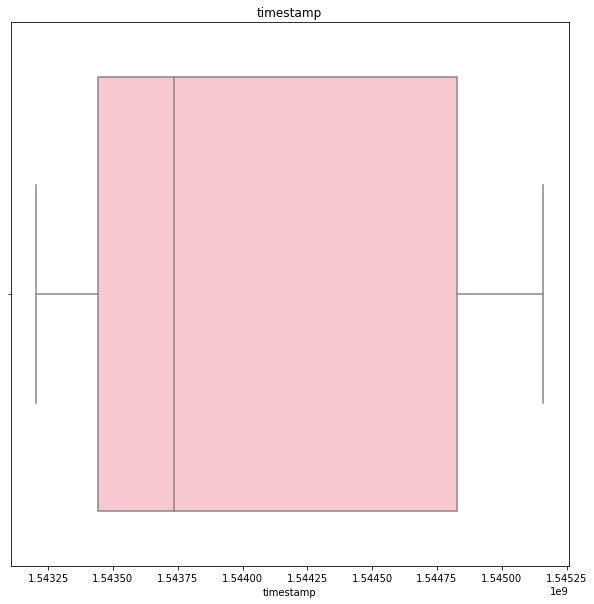

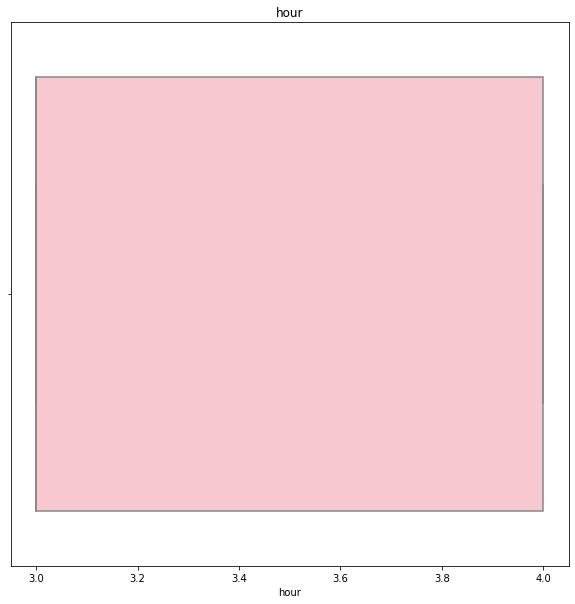

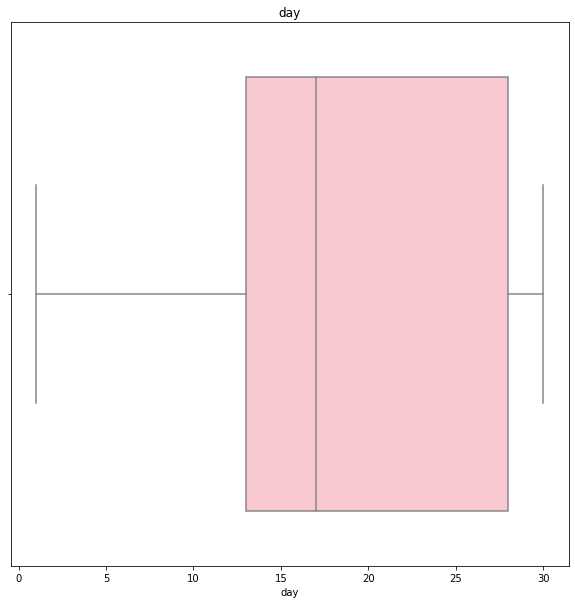

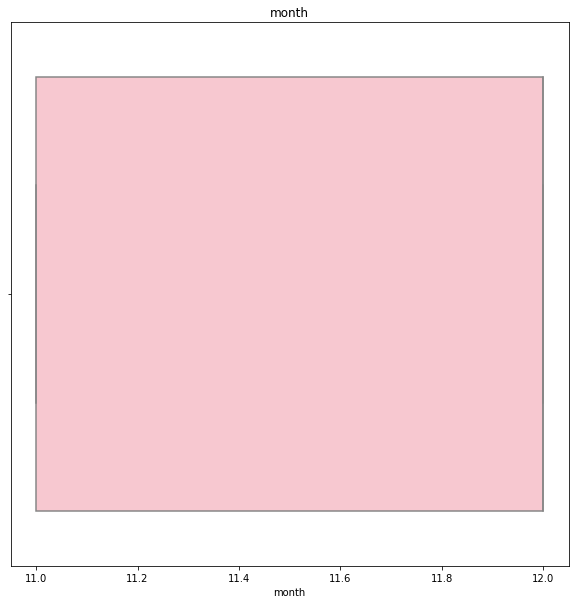

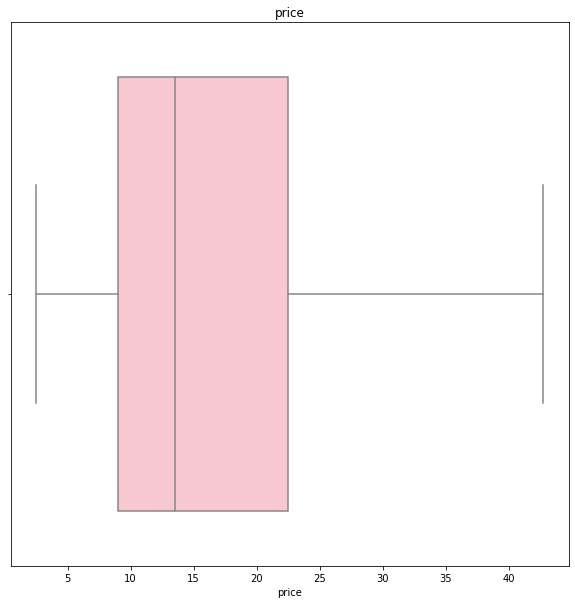

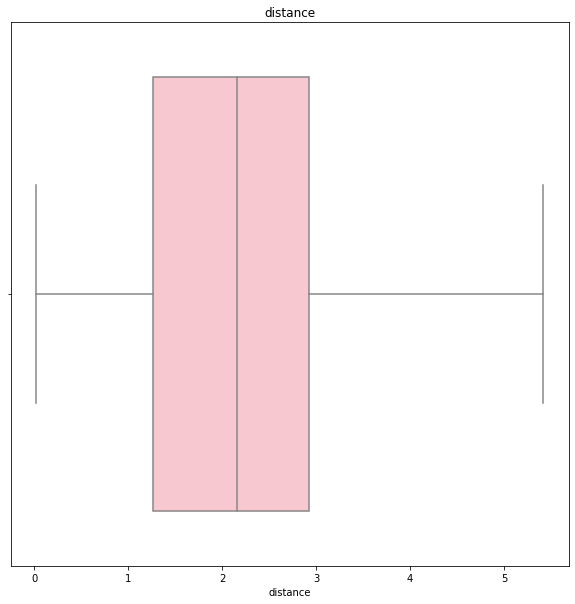

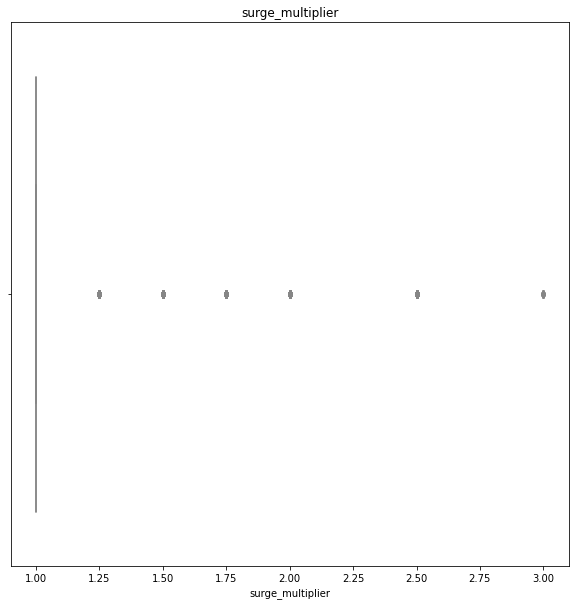

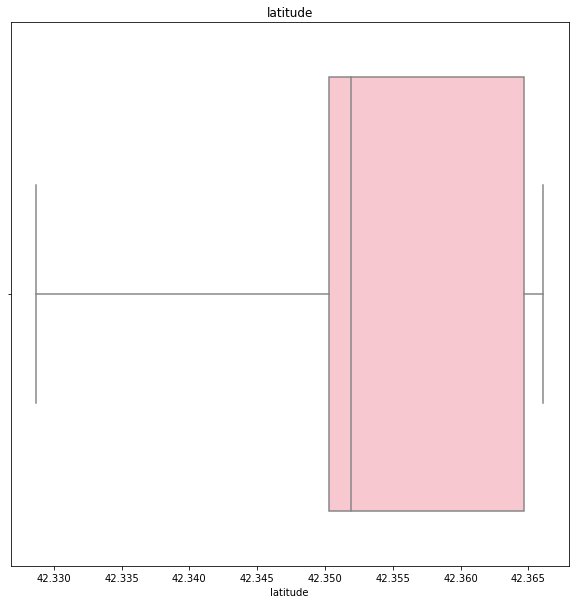

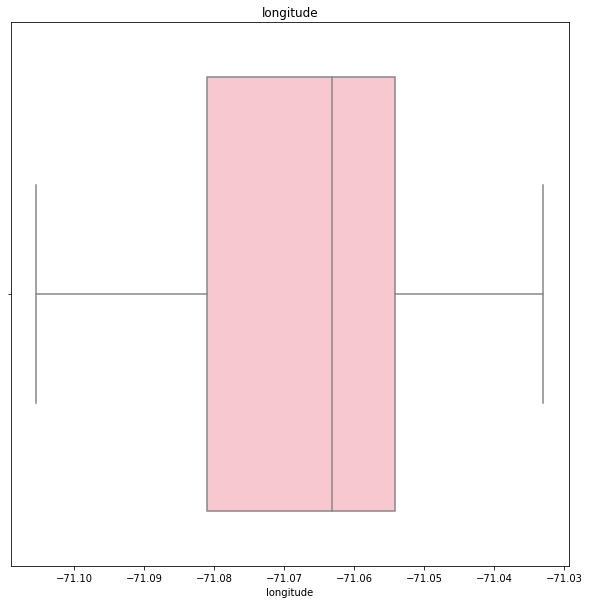

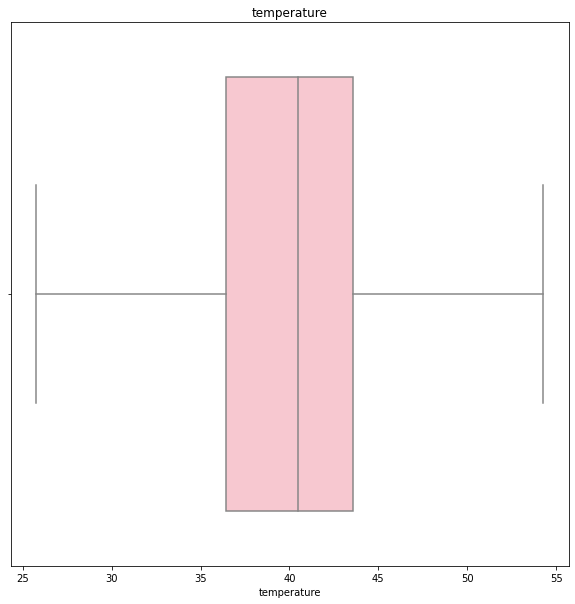

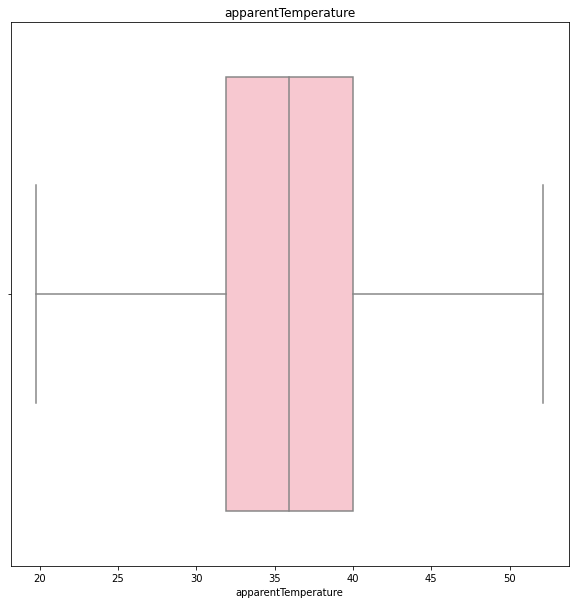

In [60]:
for feature in numerical_features:
    plt.figure(figsize=(10,10))
    sns.boxplot(data[feature])
    plt.title(feature)

In [61]:
data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,4.0,16.0,12.0,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.3287,-71.033,42.34,37.12,Mostly Cloudy
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,3.0,27.0,11.0,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.3287,-71.033,43.58,37.35,Rain
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,3.0,28.0,11.0,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.3287,-71.033,38.33,32.93,Clear
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,3.0,30.0,11.0,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.3287,-71.033,34.38,29.63,Clear
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3.0,29.0,11.0,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.3287,-71.033,37.44,30.88,Partly Cloudy


In [62]:
numerical_features_with_null = [feature for feature in numerical_features if data[feature].isnull().sum()]
numerical_features_with_null

[]

In [63]:
for feature in numerical_features_with_null:
    mean_value = data[feature].mean()
    data[feature].fillna(mean_value,inplace=True)

In [64]:
data.corr()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature
timestamp,1.000000,0.963955,-0.341420,0.771245,0.000893,0.003401,0.000611,0.090734,-0.136716,-0.240779,-0.207043
hour,0.963955,1.000000,-0.183095,0.644921,0.001171,0.003635,0.000579,0.123970,-0.123425,-0.293429,-0.264059
day,-0.341420,-0.183095,1.000000,-0.861325,-0.000892,-0.001468,0.001397,0.047946,0.078539,-0.098656,-0.243373
month,0.771245,0.644921,-0.861325,1.000000,0.001074,0.002785,-0.000612,0.016028,-0.126763,-0.067701,0.048623
price,0.000893,0.001171,-0.000892,0.001074,1.000000,0.345469,0.204225,0.002437,-0.001436,0.000137,0.000049
distance,0.003401,0.003635,-0.001468,0.002785,0.345469,1.000000,0.027924,0.001291,-0.000705,-0.002871,-0.003305
surge_multiplier,0.000611,0.000579,0.001397,-0.000612,0.204225,0.027924,1.000000,0.000831,-0.001961,-0.001412,-0.002276
latitude,0.090734,0.123970,0.047946,0.016028,0.002437,0.001291,0.000831,1.000000,-0.138392,-0.077893,-0.053881
longitude,-0.136716,-0.123425,0.078539,-0.126763,-0.001436,-0.000705,-0.001961,-0.138392,1.000000,0.005099,-0.016592
temperature,-0.240779,-0.293429,-0.098656,-0.067701,0.000137,-0.002871,-0.001412,-0.077893,0.005099,1.000000,0.946070


<AxesSubplot:>

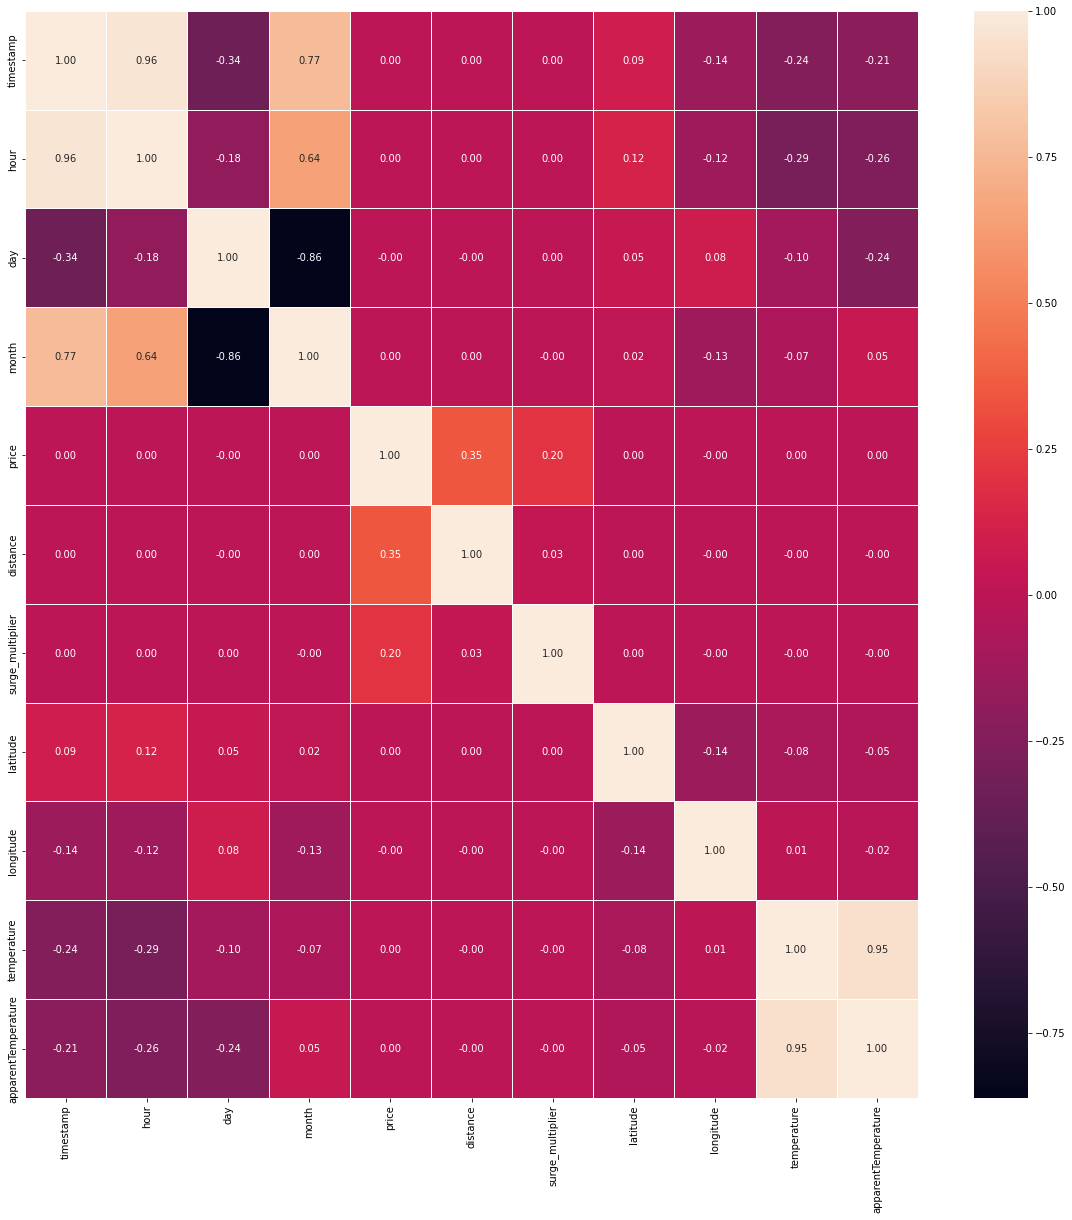

In [65]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),linewidths=0.5,annot=True,fmt=".2f")

In [66]:
categorical_features

['id',
 'datetime',
 'timezone',
 'source',
 'destination',
 'cab_type',
 'product_id',
 'name',
 'short_summary']

In [67]:
# Encoding Categorical Features using replace function:

data['cab_type'].replace({'Lyft':0, 'Uber': 1}, inplace = True)


In [68]:
def encode_data(feature_name):
    
    ''' 
    
     function which takes feature name as a parameter and return mapping dictionary to replace(or map) categorical data 
     to numerical data.
     
    '''
    
    mapping_dict = {}
    unique_values = list(data[feature_name].unique())
    for idx in range(len(unique_values)):
        mapping_dict[unique_values[idx]] = idx
    print(mapping_dict)
    return mapping_dict

In [69]:
data['product_id'].replace(encode_data('product_id'),inplace = True)

{'lyft_line': 0, 'lyft_premier': 1, 'lyft': 2, 'lyft_luxsuv': 3, 'lyft_plus': 4, 'lyft_lux': 5, '6f72dfc5-27f1-42e8-84db-ccc7a75f6969': 6, '6c84fd89-3f11-4782-9b50-97c468b19529': 7, '55c66225-fbe7-4fd5-9072-eab1ece5e23e': 8, '9a0e7b09-b92b-4c41-9779-2ad22b4d779d': 9, '6d318bcc-22a3-4af6-bddd-b409bfce1546': 10, '997acbb5-e102-41e1-b155-9df7de0a73f2': 11}


In [70]:
data['name'].replace(encode_data('name'),inplace = True)

{'Shared': 0, 'Lux': 1, 'Lyft': 2, 'Lux Black XL': 3, 'Lyft XL': 4, 'Lux Black': 5, 'UberXL': 6, 'Black': 7, 'UberX': 8, 'WAV': 9, 'Black SUV': 10, 'UberPool': 11}


In [71]:
data['short_summary'].replace(encode_data('short_summary'),inplace = True)

{' Mostly Cloudy ': 0, ' Rain ': 1, ' Clear ': 2, ' Partly Cloudy ': 3, ' Overcast ': 4, ' Light Rain ': 5, ' Foggy ': 6, ' Possible Drizzle ': 7, ' Drizzle ': 8}


In [72]:
data['surge_multiplier'].replace(encode_data('surge_multiplier'),inplace = True)

{1.0: 0, 1.25: 1, 2.5: 2, 2.0: 3, 1.75: 4, 1.5: 5, 3.0: 6}


In [73]:
data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,4.0,16.0,12.0,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,0,0,0,5.0,0.44,0.0,42.3287,-71.033,42.34,37.12,0
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,3.0,27.0,11.0,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,0,1,1,11.0,0.44,0.0,42.3287,-71.033,43.58,37.35,1
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,3.0,28.0,11.0,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,0,2,2,7.0,0.44,0.0,42.3287,-71.033,38.33,32.93,2
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,3.0,30.0,11.0,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,0,3,3,26.0,0.44,0.0,42.3287,-71.033,34.38,29.63,2
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3.0,29.0,11.0,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,0,4,4,9.0,0.44,0.0,42.3287,-71.033,37.44,30.88,3


In [74]:
X = data.drop(['id','timestamp','hour','day','month','datetime','timezone','source','destination','product_id','price','latitude','longitude','temperature','apparentTemperature','short_summary','cab_type'], axis = 1)
y = data['price']

In [75]:
X.head()

,name,distance,surge_multiplier
0,0,0.44,0.0
1,1,0.44,0.0
2,2,0.44,0.0
3,3,0.44,0.0
4,4,0.44,0.0


In [76]:
etr_model = ExtraTreesRegressor()
etr_model.fit(X,y)


ExtraTreesRegressor()

In [77]:
etr_model.feature_importances_

array([0.82852041, 0.13654687, 0.03493272])

<AxesSubplot:>

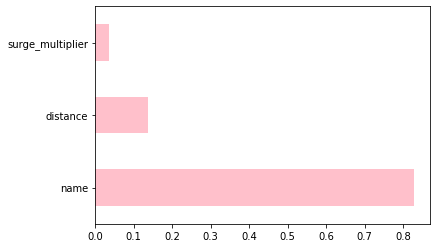

In [78]:
# visualizing feature importance using bar graph:

feature_imp = pd.Series(etr_model.feature_importances_,index=X.columns)
feature_imp.nlargest(10).plot(kind='barh')

In [79]:
feature_imp


name                0.828520
distance            0.136547
surge_multiplier    0.034933
dtype: float64

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [81]:
print("Length of Training Data: {}".format(len(X_train)))
print("Length of Testing Data: {}".format(len(X_test)))

Length of Training Data: 446583
Length of Testing Data: 191393


In [82]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [83]:
X_test = scaler.transform(X_test)

In [84]:
lr = LinearRegression() 
lm_model = lr.fit(X_train, y_train)
y_pred = lm_model.predict(X_test)
lr_train_r2 = lr.score(X_train, y_train)
lr_test_r2 = lr.score(X_test, y_test)
lr_mse = mean_squared_error(y_pred, y_test)
lr_rmse = np.sqrt(lr_mse)
errors = abs(y_pred - y_test)
mape = 100 * (errors / y_test)
lr_accuracy = 100 - np.mean(mape)

print('Linear Regression train R squared: %.4f' % lr_train_r2)
print('Linear Regression test R squared: %.4f' % lr_test_r2)
print('Linear Regression test RMSE: %.4f' % lr_rmse)
print('LASSO Accuracy:', round(lr_accuracy, 2), '%.')

Linear Regression train R squared: 0.1577
Linear Regression test R squared: 0.1566
Linear Regression test RMSE: 8.3172
LASSO Accuracy: 44.22 %.


In [85]:
regr = RandomForestRegressor(n_estimators = 500, random_state = 42)
regr.fit(X_train, y_train)
rf_train_r2 = regr.score(X_train,y_train)
rf_test_r2 = regr.score(X_test, y_test)
predictions = regr.predict(X_test)
forest_mse = mean_squared_error(predictions, y_test)
forest_rmse = np.sqrt(forest_mse)
errors = abs(predictions - y_test)
mape = 100 * (errors / y_test)
rf_accuracy = 100 - np.mean(mape)

print('Random Forest train R squared is: %.4f' % rf_train_r2)
print('Random Forest test R squared: %.4f' % rf_test_r2)
print('Random Forest RMSE: %.4f' % forest_rmse)
print('Random Forest Accuracy:', round(rf_accuracy, 2), '%.')

Random Forest train R squared is: 0.9674
Random Forest test R squared: 0.9661
Random Forest RMSE: 1.6662
Random Forest Accuracy: 91.77 %.


In [86]:
data = {"Model": ["Linear Regression",  "Random Forest"], 
"Train R2": [lr_train_r2, rf_train_r2],
"Test R2": [lr_test_r2, rf_test_r2],
"Test RMSE": [lr_rmse, forest_rmse],
"Accuracy": [lr_accuracy,rf_accuracy]}

summary_table = pd.DataFrame(data)
display(summary_table)

,Model,Train R2,Test R2,Test RMSE,Accuracy
0,Linear Regression,0.157665,0.156594,8.317173,44.223044
1,Random Forest,0.967412,0.966150,1.666242,91.767948


In [88]:
with open('RandomForest.pkl', 'wb') as file:
    pickle.dump(regr, file)